##Step 0: Imports and Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.options.display.max_rows = 200

In [2]:
DATA_URL ="https://raw.githubusercontent.com/zjianwai-97/Mathematical-modeling/354ae3470fb5bca9619a76ddc65c39106a02277e/"

In [3]:
df = pd.read_csv(DATA_URL + "adult_train.csv")
df.head(10)

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


##Step 1: Data Understanding

In [4]:
df.shape

(32561, 15)

In [5]:
df.columns

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education_Num',
       'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_Gain', 'Capital_Loss', 'Hours_per_week', 'Country', 'Target'],
      dtype='object')

In [6]:
df.dtypes

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education_Num      int64
Martial_Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_Gain       int64
Capital_Loss       int64
Hours_per_week     int64
Country           object
Target            object
dtype: object

In [7]:
df.describe()

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Step 2: Data Preperation

In [8]:
df.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [25]:
df = df[['Age', 'Workclass', 'fnlwgt', 'Education', 
    #'Education_Num','Martial_Status', 
    'Occupation', 
    #'Relationship', 'Race', 'Sex','Capital_Gain', 'Capital_Loss', 
    'Hours_per_week', 
    'Country','Target']].copy()

In [26]:
df.shape

(32561, 8)

In [27]:
df.dtypes

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Occupation        object
Hours_per_week     int64
Country           object
Target            object
dtype: object

In [29]:
df = df.rename(columns={'fnlwgt':'Final_Weight'})

In [31]:
df.head()

,Age,Workclass,Final_Weight,Education,Occupation,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,Adm-clerical,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Exec-managerial,13,United-States,<=50K
2,38,Private,215646,HS-grad,Handlers-cleaners,40,United-States,<=50K
3,53,Private,234721,11th,Handlers-cleaners,40,United-States,<=50K
4,28,Private,338409,Bachelors,Prof-specialty,40,Cuba,<=50K


#Checkformissingdata

In [32]:
df.isna().sum()

Age                  0
Workclass         1836
Final_Weight         0
Education            0
Occupation        1843
Hours_per_week       0
Country            583
Target               0
dtype: int64

#Checkforduplicateddata

In [36]:
df.loc[df.duplicated()]

,Age,Workclass,Final_Weight,Education,Occupation,Hours_per_week,Country,Target
3781,23,Private,200973,HS-grad,Adm-clerical,40,United-States,<=50K
4881,25,Private,308144,Bachelors,Craft-repair,40,Mexico,<=50K
5104,90,Private,52386,Some-college,Other-service,35,United-States,<=50K
9171,21,Private,250051,Some-college,Prof-specialty,10,United-States,<=50K
11631,20,Private,107658,Some-college,Tech-support,10,United-States,<=50K
12298,28,Private,66473,HS-grad,Machine-op-inspct,40,United-States,<=50K
12322,57,Private,175942,Some-college,Exec-managerial,50,United-States,>50K
13084,25,Private,195994,1st-4th,Priv-house-serv,40,Guatemala,<=50K
14092,23,Private,179413,HS-grad,Craft-repair,40,United-States,<=50K
15059,21,Private,243368,Preschool,Farming-fishing,50,Mexico,<=50K


In [37]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32561, dtype: bool

In [39]:
df.loc[df.duplicated(subset=['Final_Weight'])].head(5)

,Age,Workclass,Final_Weight,Education,Occupation,Hours_per_week,Country,Target
443,44,Private,116632,Some-college,Prof-specialty,40,United-States,>50K
460,44,Private,116632,Assoc-acdm,Farming-fishing,40,United-States,<=50K
594,23,Private,117789,Bachelors,Adm-clerical,40,United-States,<=50K
680,29,Local-gov,92262,HS-grad,Protective-serv,48,United-States,<=50K
719,34,Private,217460,Bachelors,Exec-managerial,45,United-States,>50K


In [41]:
#Checking an example duplicate
df.query('Final_Weight == "116632"')

,Age,Workclass,Final_Weight,Education,Occupation,Hours_per_week,Country,Target


In [42]:
df.columns

Index(['Age', 'Workclass', 'Final_Weight', 'Education', 'Occupation',
       'Hours_per_week', 'Country', 'Target'],
      dtype='object')

In [51]:
df=df.loc[~df.duplicated(subset=['Final_Weight','Workclass','Occupation'])]\
.reset_index(drop=True).copy()

In [52]:
df.shape

(30933, 8)

##Step 3: Feature Understanding

(Univariate analysis)

In [57]:
df['Hours_per_week']. value_counts()

40    14449
50     2649
45     1722
60     1410
35     1236
20     1180
30     1090
25      645
55      640
48      490
38      454
15      392
70      276
10      267
32      247
24      242
65      231
36      209
42      209
44      200
16      198
12      168
8       145
37      139
43      138
80      129
52      125
56       97
28       84
99       82
46       77
18       74
72       70
75       64
6        62
5        59
4        52
47       47
84       42
22       41
54       41
33       38
39       38
3        38
41       33
14       32
2        31
27       30
26       29
17       28
90       28
49       28
34       27
58       27
7        25
53       25
21       23
13       22
23       20
1        19
9        18
66       17
62       16
57       15
51       13
64       13
19       12
85       12
68       11
98       11
11       10
63        8
78        8
77        6
96        5
31        5
59        5
29        5
67        4
76        3
81        3
91        3
61        2
88  

Text(0, 0.5, 'Amount of Peoples')

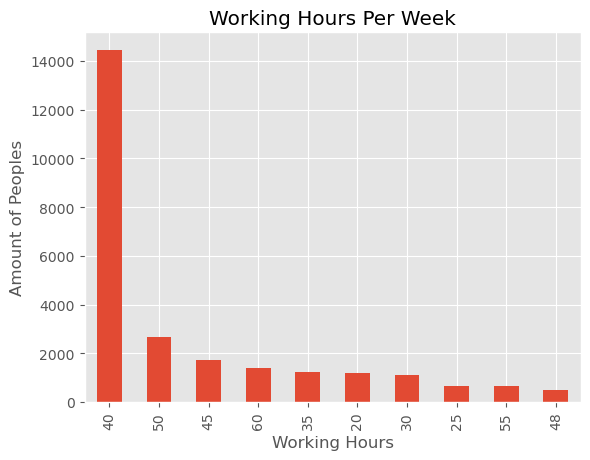

In [61]:
ax=df['Hours_per_week']. value_counts()\
.head(10)\
.plot(kind='bar',title='Working Hours Per Week')
ax.set_xlabel('Working Hours')
ax.set_ylabel('Amount of Peoples')

Text(0.5, 0, 'Percentage')

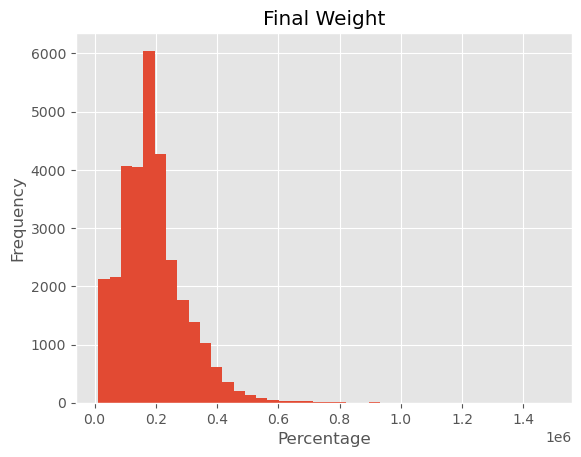

In [66]:
ax=df['Final_Weight'].plot(kind='hist',
                           bins=40, 
                           title="Final Weight")
ax.set_xlabel('Percentage')

Text(0.5, 0, 'Percentage')

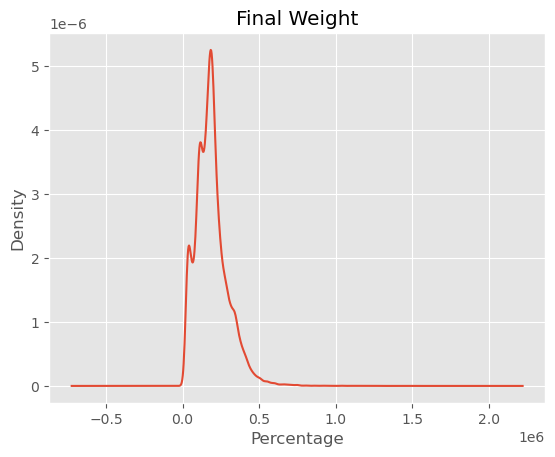

In [67]:
ax=df['Final_Weight'].plot(kind='kde',
                           title="Final Weight")
ax.set_xlabel('Percentage')

##Step 4: Feature Relationships

Use scatterplot and pairplot to feature relationships.

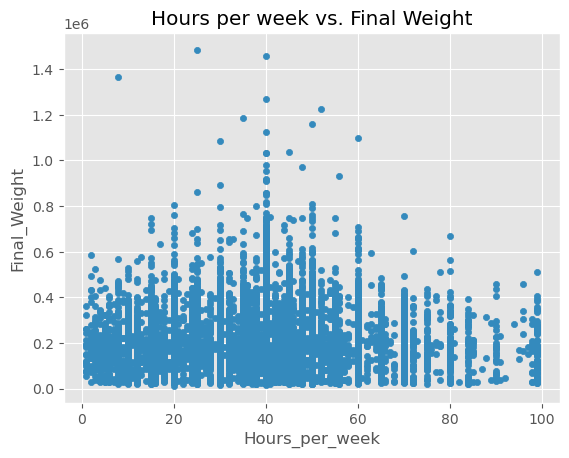

In [71]:
df.plot(kind='scatter',
        x='Hours_per_week',
        y='Final_Weight',
       title='Hours per week vs. Final Weight')
plt.show()

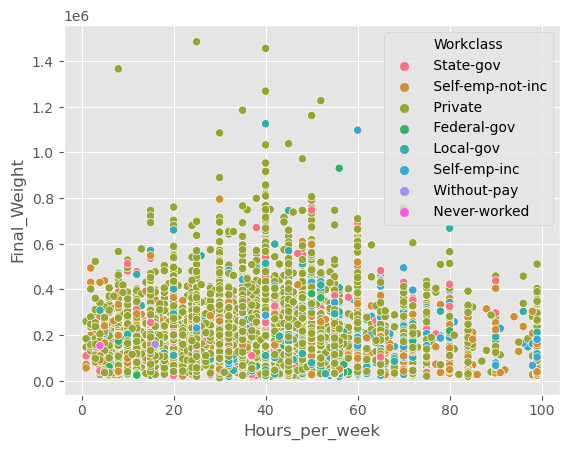

In [79]:
sns.scatterplot(x='Hours_per_week',
                y='Final_Weight',
                hue="Workclass",
                data=df)
plt.show()

In [80]:
df

,Age,Workclass,Final_Weight,Education,Occupation,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,Adm-clerical,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Exec-managerial,13,United-States,<=50K
2,38,Private,215646,HS-grad,Handlers-cleaners,40,United-States,<=50K
3,53,Private,234721,11th,Handlers-cleaners,40,United-States,<=50K
4,28,Private,338409,Bachelors,Prof-specialty,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...
30928,27,Private,257302,Assoc-acdm,Tech-support,38,United-States,<=50K
30929,40,Private,154374,HS-grad,Machine-op-inspct,40,United-States,>50K
30930,58,Private,151910,HS-grad,Adm-clerical,40,United-States,<=50K
30931,22,Private,201490,HS-grad,Adm-clerical,20,United-States,<=50K


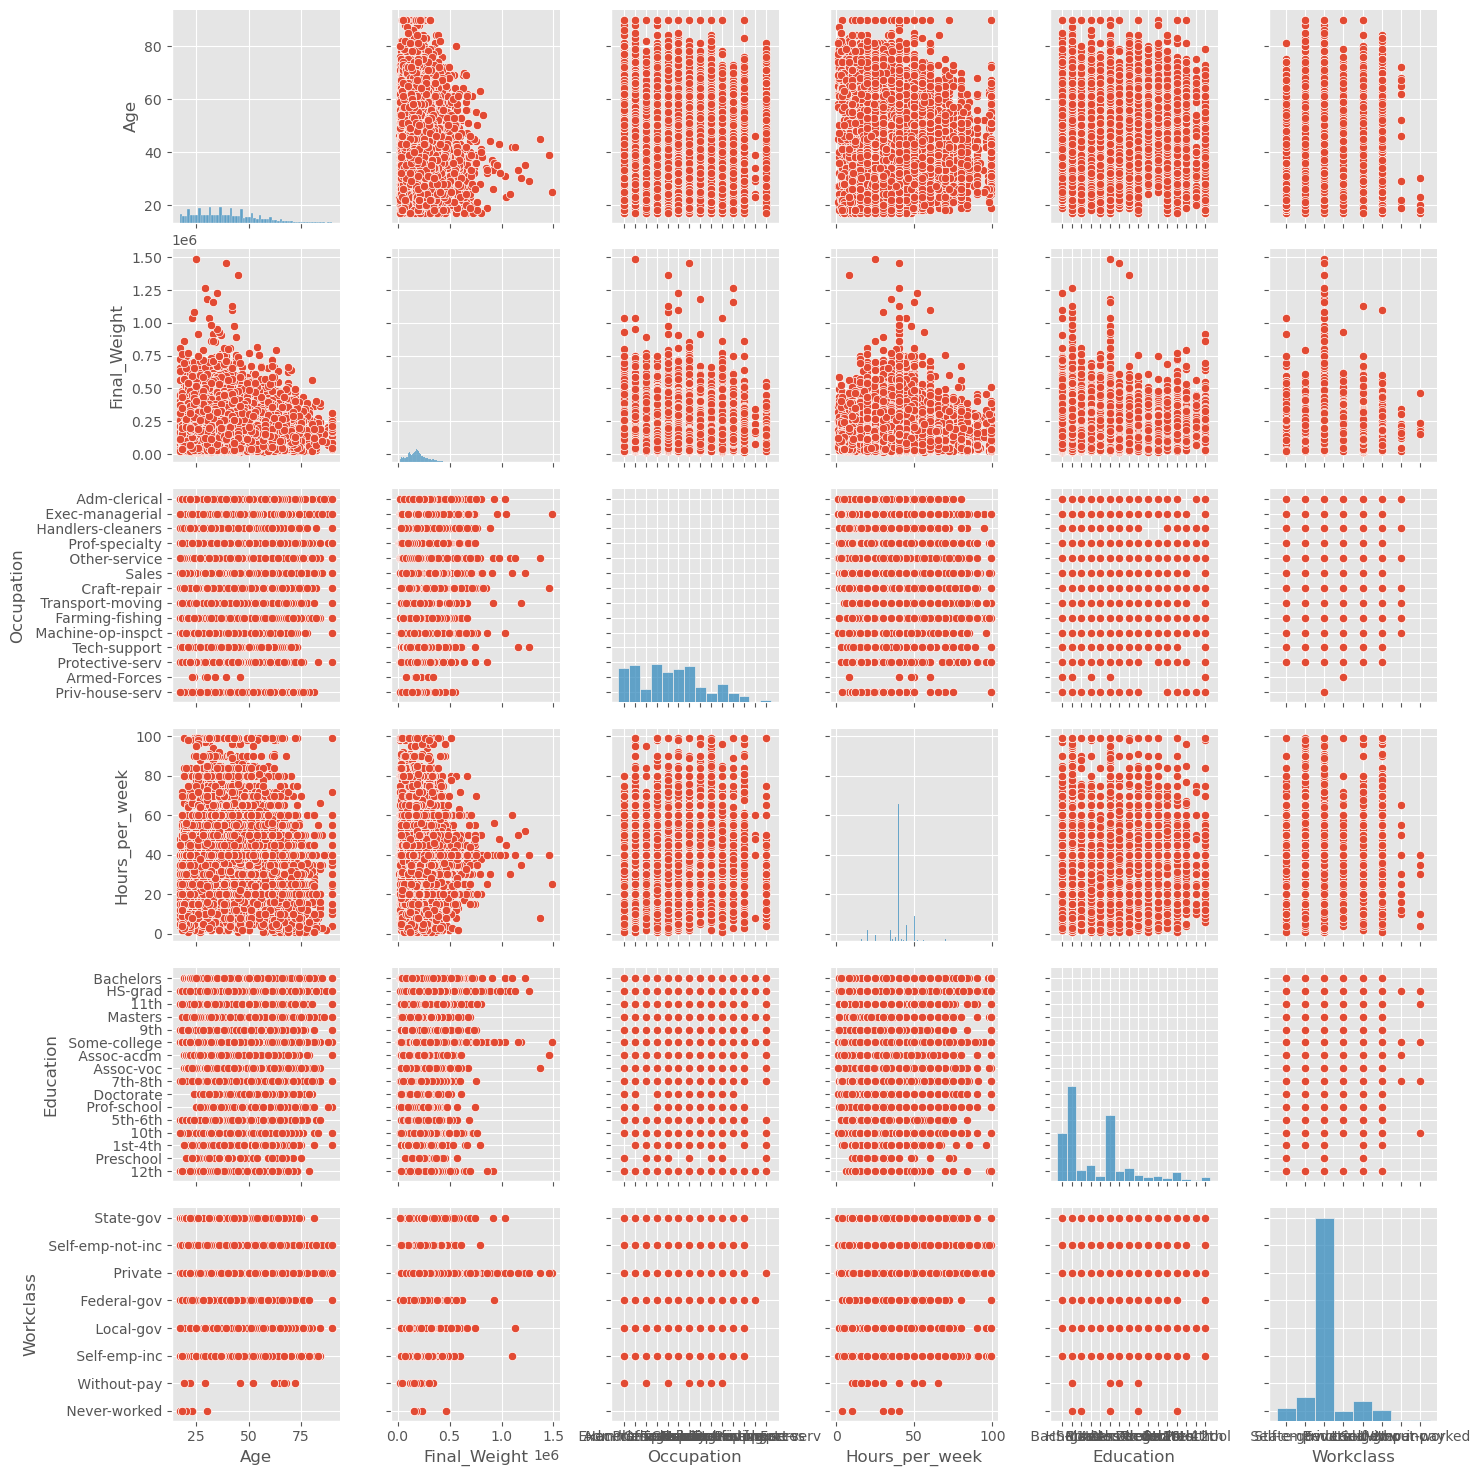

In [89]:
sns.pairplot(df,vars=['Age','Final_Weight','Occupation','Hours_per_week','Education','Workclass'])
plt.show()

In [93]:
df_corr=df[['Age','Final_Weight','Occupation',
    'Hours_per_week','Education','Workclass','Country']].dropna().corr()
df_corr

,Age,Final_Weight,Hours_per_week
Age,1.000000,-0.076622,0.097310
Final_Weight,-0.076622,1.000000,-0.022612
Hours_per_week,0.097310,-0.022612,1.000000


<AxesSubplot:>

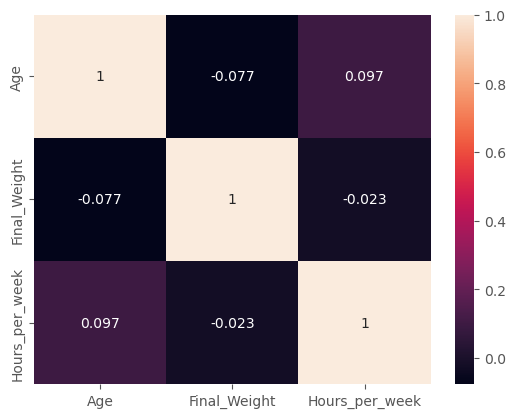

In [95]:
sns.heatmap(df_corr, annot=True)

## Step 5: Ask a Question about the data 
Which workclass, they will have the longest working hours for a week?

In [96]:
df.head()

,Age,Workclass,Final_Weight,Education,Occupation,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,Adm-clerical,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Exec-managerial,13,United-States,<=50K
2,38,Private,215646,HS-grad,Handlers-cleaners,40,United-States,<=50K
3,53,Private,234721,11th,Handlers-cleaners,40,United-States,<=50K
4,28,Private,338409,Bachelors,Prof-specialty,40,Cuba,<=50K


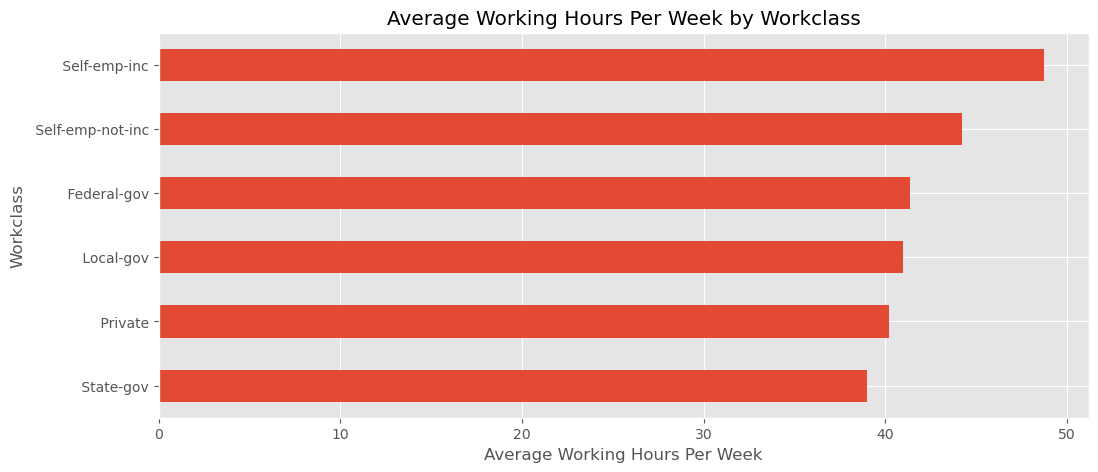

In [110]:
ax=df.query('Workclass != "Self-emp-not-inc"')\
.groupby('Workclass')['Hours_per_week']\
.agg(['mean','count'])\
.query('count >= 100')\
.sort_values('mean') ['mean']\
.plot(kind='barh', figsize=(12,5), title='Average Working Hours Per Week by Workclass')
ax.set_xlabel('Average Working Hours Per Week')
plt.show()

## Conclusion

For my conclusion,based on the bar chart, I knew that Self-emp-incs have the longest average working hours in a week. 